# COGS 108 - Final Project 

# Overview

Summary of your project w/results

# Name & PID

- Name: Janica Peredo
- PID: A15750337

# Research Question

# *Is there a relationship between restaurant inspection scores and the number of violations?*

## Background and Prior Work


In understanding the importance of restaurant inspection scores, it acts as a preventative decision in order to lessen foodborne illnesses. Foodborne illnesses are defined as infections caused by bacteria, viruses, parasites, and/or toxins when ingesting food. There are currently 31 known pathogens which make-up 21% of 179 million reported foodborne illnesses in the United States. The rest are unknown. In looking at restaurant hygiene before restaurant inspection scores were implemented in 1998, it was found that 50% of foodborne illnesses were attributed to restaurants. Approximately 325,000 people in 1999 were infected with 5,000 attributed deaths (Simon 2005). In 2011, the Center for Disease Control and Prevention (CDC) found that on average 128,000 people are hospitalized and approximately 3,000 attributed deaths (Scallan 2011). This brings up the question on the effectiveness of restaurant inspection scores as there appears to be a negative relationship between the first introduction of the score and the amount of hospitalizations. Restaurants with low inspection scores were seen to have an association with foodborne illnesses. However, in determining the relationship, more research is needed to determine causality. 
    
One thing to note is in Tennessee, it was found that the 12 most commonly cited violations were non-critical food hazards.This includes proper flooring, walls, food protection during storage, ice contact, etc. The most critical violation found was storing cleaning fluids which was number 13 in most commonly cited (Jones 2004). The average score was also found the be approximately 80%. There seemed to be a variation between inspector scores and different regions. Therefore there may be a possible variation between inspection scores. This should be accounted for as the scores could be based on bias rather than uniformity. An Enviromnetal Health Specialist Network was introduced by the CDC and Food and Drug Association (FDA) in order to improve food health and reduce foodborne illnesses (Jones 2004). Overall it was found that more research was needed to find a causation between food inspection scores and the decrease with foodborne illnesses. In looking at the data set, some things this research will be looking for relationships between: inspectors and their respective scores; critical and non-critical food hazards; the number of food hazards and scores. 

References (include links):
- 1) Simon, Paul & Leslie, Phillip & Run, Grace & Jin, Ginger & Reporter, Roshan & Aguirre, Arturo & Fielding, Jonathan. (2005). Impact of restaurant hygiene grade cards on foodborne-disease hospitalizations in Los Angeles County. Journal of environmental health. 67. 32-6, 56; quiz 59. 
https://www.researchgate.net/publication/7942379_Impact_of_restaurant_hygiene_grade_cards_on_foodborne-disease_hospitalizations_in_Los_Angeles_County 

- 2)Jones, T. F., Pavlin, B. I., LaFleur, B. J., Ingram, L. A., & Schaffner, W. (2004). Restaurant inspection scores and foodborne disease. Emerging infectious diseases, 10(4), 688–692. https://doi.org/10.3201/eid1004.030343
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3323064/

- 3)Scallan E, Hoekstra RM, Angulo FJ, Tauxe RV, Widdowson M, Roy SL, et al. Foodborne illness acquired in the United States—major pathogens. Emerg Infect Dis. 2011;17(1):7-15.
https://www.cdc.gov/foodborneburden/2011-foodborne-estimates.html



# Hypothesis


*With the introduction of the food inspection scores, there should be a negative relationship between food hazards and scores. The food inspection scores represents a way for customers to measure and compare restaurants on a ratio scale. Unlike food reviews such as Yelp, it offers a way for the customer to feel safe when eating at an unknown restaurant as it is government regulated. This may become an incentive to restaurant's as attaining and maintaining a high score may increase customers. In order to have a high score, the health codes must be up-to date and therefore may lower food hazards.*

# Dataset(s)


- Dataset Name: inspections.csv
- Link to the dataset: 
- Number of observations: 18466 rows × 36 columns

I chose this data set as it listed the amount of non-critical hazards, critical hazards, health inspectors, and scores. The violations.csv did not include the scores which was important to my research. It is also based in North Carolina. 

# Setup

In [26]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr, norm, ttest_ind

df_inspections = pd.read_csv('inspections.csv')

# Data Cleaning

The first step was to determine what columns were included in the data set. I found that there were a lot of unneeded columns. I included hsisid just incase I wanted to link the specific restaurant to the scores. Zipcode to find a relationship with regards to area. Days_from_open_date in order to see if restaurants were more likely to lower their scores with age. Inspector_id to see if inspectors were more likely to give higher scores. Scores nad num_critical/non_num_critical in order to see if health hazards were affected by hazards. Inspection_num to see if the amount of inspections affects scores. 

I then sorted by inspector_id after getting the generalized shape. I dropped any NaN in the inspector_id since I wanted to see the effect of inspectors on score variation. 

In [27]:

df_inspections.head()
df_inspections_14 = df_inspections.drop(labels =['postalcode','name', 'address1', 'address2', 'city','state', 'phonenumber','restaurantopendate', 'num_critical_previous','num_non_critical_previous', 'num_critical_mean_previous','num_non_critical_mean_previous','avg_neighbor_num_critical','avg_neighbor_num_non_critical', 'top_match','second_match','critical','previous_inspection_by_same_inspector','days_since_previous_inspection','previous_inspection_date','inspectedby','description','type','x','y','geocodestatus','date'],axis=1)

df_inspections_14.head()


,hsisid,days_from_open_date,facilitytype,zip,inspection_num,inspector_id,score,num_critical,num_non_critical
0,4092013748,3562,Restaurant,27610,1,27.0,96.0,9,7
1,4092014046,3062,Restaurant,27610,1,7.0,98.0,0,11
2,4092015191,1509,Restaurant,27610,1,3.0,97.0,4,8
3,4092016122,177,Restaurant,27513,1,24.0,99.0,2,3
4,4092021513,1670,Food Stand,27597,1,7.0,97.0,2,4


The shape shows that the inspector scores were relatively high. 
The mean being 96.23 with a small std of 2.65. 

In [28]:
df_inspections_14['score'].hasnans # I wanted to make sure the data wasn't missing any values. 
df_score= df_inspections_14['score'] #I created a separate df. 
df_score=df_score.dropna() #I tried to dropped scores. There was no missing scores

df_score.describe() # I looked into the shape of the score column of the df and stored it into a dictionary. 
df_score_shape = {'df_I_mean':96.23, 'df_I_std': 2.65,'df_I_min': 72.50, 'df_I_max':100, 'df_I_50': 97}
df_score_shape

{'df_I_mean': 96.23,
 'df_I_std': 2.65,
 'df_I_min': 72.5,
 'df_I_max': 100,
 'df_I_50': 97}

In [29]:
df_I_score = df_inspections_14.groupby('score').agg('mean') 
# I used groupby for scores as it allowed me to find the
#highest to lowest. 

df_I_score

,hsisid,days_from_open_date,zip,inspection_num,inspector_id,num_critical,num_non_critical
score,,,,,,,
72.5,4.092015e+09,2945.000000,27511.000000,10.000000,2.000000,15.000000,14.000000
75.0,4.092015e+09,2966.500000,27609.500000,4.000000,5.500000,11.000000,13.500000
76.0,4.092017e+09,102.000000,27560.000000,1.000000,31.000000,12.000000,23.000000
77.5,4.092014e+09,3474.000000,27612.000000,2.000000,2.000000,17.000000,17.000000
78.5,4.092015e+09,2127.000000,27576.333333,3.000000,21.333333,13.666667,15.000000
79.0,4.092014e+09,4383.000000,27606.000000,10.000000,2.000000,10.000000,11.000000
80.0,4.092015e+09,2371.800000,27535.200000,4.000000,10.400000,14.400000,13.600000
80.5,4.092016e+09,1370.000000,27529.666667,6.333333,9.333333,15.666667,14.666667
81.0,4.092014e+09,3918.000000,27592.500000,3.000000,21.000000,9.750000,16.500000


In [30]:
df_inspections_14.dropna(subset = ['inspector_id'], inplace = True) 
# I dropped missing values under inspector_id
df= df_inspections_14.sort_values(by=['inspector_id']) 
#sorted by inspector ID

df

,hsisid,days_from_open_date,facilitytype,zip,inspection_num,inspector_id,score,num_critical,num_non_critical
4780,4092016380,284,Restaurant,27615,2,1.0,98.0,2,5
7868,4092110124,5150,Public School Lunchrooms,27539,7,1.0,97.0,3,1
15480,4092016559,868,Restaurant,27526,5,1.0,90.0,12,15
15481,4092016571,846,Restaurant,27540,6,1.0,94.5,5,9
2672,4092015610,1133,Restaurant,27539,2,1.0,92.0,7,14
...,...,...,...,...,...,...,...,...,...
607,4092013354,4165,Restaurant,27613,1,32.0,95.0,8,12
797,4092020870,5005,Food Stand,27615,1,32.0,97.5,4,10
3387,4092011561,6896,Restaurant,27615,2,32.0,95.0,4,11
2193,4092016375,63,Restaurant,27615,1,32.0,96.5,7,12


# Data Analysis & Results

In [31]:
df_score_shape

{'df_I_mean': 96.23,
 'df_I_std': 2.65,
 'df_I_min': 72.5,
 'df_I_max': 100,
 'df_I_50': 97}

The first thing I did was a T-Test in order to find a relationship between num_critical, num_non_critical, inspector_id, and score. I found that the t-tests all had p-values of 0. With a p-value of ~0, we would reject the null hypothesis. There is significant evidence to suggest a correlation with regards to num_critical vs. score, score vs. inspector_id, and num_critical vs. num_non_critical. However, the relationship is not explicit. 

I then tried to see if the average mean of inspector_id regarding if their scores were different. However, since the interquartile would deem anything below 90.93 as an outlier, there seemed to be no outliers (mean-2* std). The lowest was 92.57.


In [32]:
tTest_result_1=ttest_ind(a=df['num_critical'], b = df['score'])
# Num_critical may have a relationship with score. 
tTest_result_2=ttest_ind(a=df['score'], b=df['inspector_id'])
#Score and inspector_ID may have a relationship with score
tTest_result_3=ttest_ind(a=df['num_critical'],b=df['num_non_critical'])
# Num_critical and num_non_critical may have a relationship with each other. 

df_1=df.groupby(['inspector_id'])['score'].mean()
# There doesn't seem to be any outliers
# the lowest score by inspector 31 is not an outlier as it is withing IQR.

print(tTest_result_1)
print(tTest_result_2,)
print(tTest_result_3)
#the p value for all is less than .05, which is less than null. 

print(df_1)

Ttest_indResult(statistic=-3283.223116759798, pvalue=0.0)
Ttest_indResult(statistic=1153.033497330941, pvalue=0.0)
Ttest_indResult(statistic=-68.01948153721771, pvalue=0.0)
inspector_id
1.0     95.067568
2.0     95.286847
3.0     97.855799
4.0     96.571942
5.0     97.199668
6.0     96.720604
7.0     96.395668
8.0     95.698966
9.0     96.992063
10.0    97.193548
11.0    95.780423
12.0    97.500000
13.0    95.236559
14.0    97.157643
15.0    96.815545
16.0    96.739884
17.0    96.500000
18.0    95.997517
19.0    96.814103
20.0    96.438596
21.0    96.792535
22.0    96.183616
23.0    96.128664
24.0    96.340491
25.0    94.659037
26.0    93.625000
27.0    95.034639
28.0    96.438245
29.0    97.156805
31.0    92.574074
32.0    96.353081
Name: score, dtype: float64


The inspector_id is is skewed right. The density plot shows it is slightly bimodal with a skew left. The lower the number, the more inspections they have done. It could mean that inspectors with lower numbers have worked longer. 

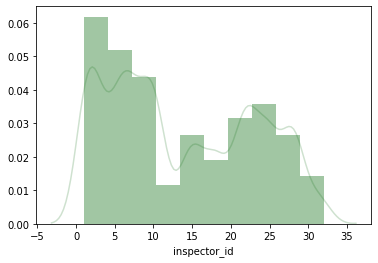

In [33]:
id_plot =sns.distplot(df['inspector_id'], bins=10, color='#16711935')


I created a boxplot to see if the num_critical was high. However, it was on the slower side with anything above 8 being an outlier. This means that the average mean of num_critical are lower than 3. 

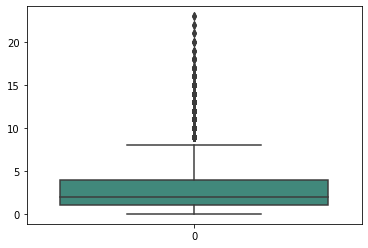

In [34]:
sns.boxplot(data=df['num_critical'], color='#359482')

Similar to num_critical, num_non_critical had a relatively low amount of hazards. The mean being closer to 5, while anything approximately above 13 being considered an outlier. A num_non_critical may not be addressed as it is not as critical as a num_critical and therefore would not be the restaurants main focuse. 

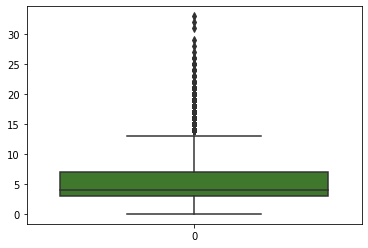

In [35]:
sns.boxplot(data=df['num_non_critical'], color='#398420')

The inspection scores are skewed left. The majority being above 95 which is close to the mean. It is otherwise a relatively normal distribution.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


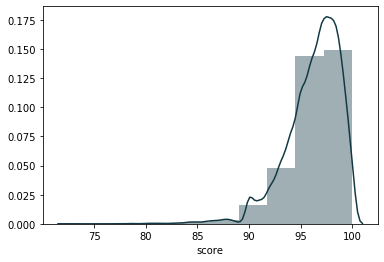

In [36]:
score_plot = sns.distplot(df['score'], bins=10, color = '#123844')

When looking at the inspector_id vs. the scores they are given, there seemed to be a bimodal distribution. Inspector_id in both the lower and higher numbers seemed to give a wider range of scores. An exception with the inspector_id of 9. This could mean that if the inspector_id was given at time of becoming an inspector since the density plot shows the lower the id, the more varied inspections. 

However when looking at the higher numbers such as id 31 and 32, there seemed to be lower scores too. This could mean that the inspectors could have restaurants with more hazards, or they were stricter. Overall, the average inspector_id vs scores when taking the means were in the IQR and no outliers. 

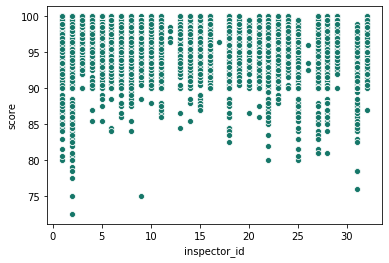

In [37]:
sns.scatterplot(x = 'inspector_id', y = 'score', data=df, color='#16776960')

In the scatterplot below, there seemed to be a negative distribution. As the scores increase, the num_critical would decrease. This is what is expected since scores should be affected by num_critical. 

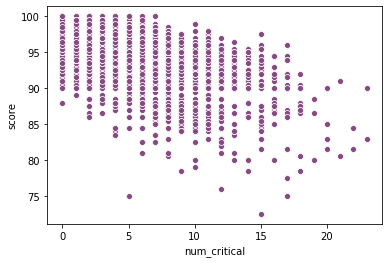

In [38]:
sns.scatterplot(x='num_critical', y='score', data=df, color='#874983')


Similar to num_critical, the num_non critical seems to havec a negative correaltion. Although the number of num_non_critical is higher. 

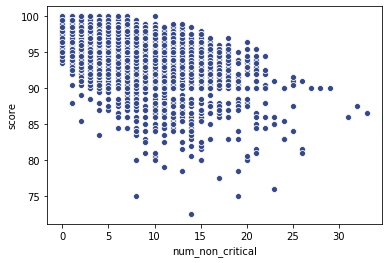

In [39]:
sns.scatterplot(x='num_non_critical', y='score', data=df, color='#374983')


In the plot below, I wanted to see if the days from open date would affect the scores. If a restaurant were to have a strong repertoire with customers, they may be less likely to maintain a health hazards because of the continuous customers. A new restaurant could also be unlikely to understand what is considered hazards.  

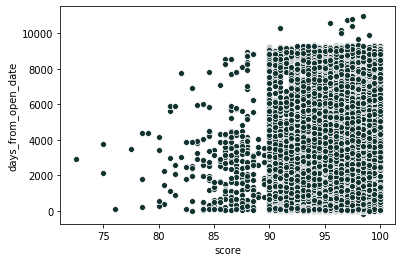

In [40]:
sns.scatterplot(x='score',y='days_from_open_date',data=df, color='#123230')


In the OLS regression results, the p-value for num_critical vs. num_non_critical suggests a relationship between the two. One can reject the null hypothesis. It makes sense as a restaurant that maintains or does not maintain num_critical would be inclined to do the same with num_non_critical. 

In [41]:
outcome, predictors = patsy.dmatrices('num_critical ~ num_non_critical', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           num_critical   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     7193.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:01:54   Log-Likelihood:                -42226.
No. Observations:               18461   AIC:                         8.446e+04
Df Residuals:                   18459   BIC:                         8.447e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7570      0.030  

I ran a correlation test to see where there might be strong correlations. The num_critical/num_non_critical seemed to have strong corelations with score. Similarly with num_critical vs. num_non_critical. Zip code does not seemed to be correlated with anything,only a small amount with inspector_id. Therefore no significance regarding zip code/area. 

In [42]:
df.corr()

,hsisid,days_from_open_date,zip,inspection_num,inspector_id,score,num_critical,num_non_critical
hsisid,1.000000,0.185822,-0.017516,0.135032,0.002089,0.192705,-0.154528,-0.164255
days_from_open_date,0.185822,1.000000,0.032539,0.311578,-0.027374,0.057900,-0.100513,-0.007214
zip,-0.017516,0.032539,1.000000,-0.028919,0.121702,0.023276,-0.093112,-0.010305
inspection_num,0.135032,0.311578,-0.028919,1.000000,-0.033721,-0.026176,-0.162673,-0.100930
inspector_id,0.002089,-0.027374,0.121702,-0.033721,1.000000,-0.081099,0.103999,0.149535
score,0.192705,0.057900,0.023276,-0.026176,-0.081099,1.000000,-0.664763,-0.634237
num_critical,-0.154528,-0.100513,-0.093112,-0.162673,0.103999,-0.664763,1.000000,0.529541
num_non_critical,-0.164255,-0.007214,-0.010305,-0.100930,0.149535,-0.634237,0.529541,1.000000


### Ethics & Privacy

In order to uphold the ethics and privacy of customers, employees, and health inspectors; a relationsional database is implemented. HSISID and inspector ids' replace the names of the restaurant and inspectors. 
The area of the data is also removed in order to prevent restaurants being identified. Zipcode is included but address and city is removed. HSISID offers a way to identify the restaurant without identifying.   

If the inspector id was not included, those data points were removed. 
Any outliers were included in the discussion. Since most of the data would is found on the government websites which is public, privacy should not be an issue if it's statistics and no identifying information was given. 

There should be no potential biases regarding particular populations. These health scores were not surveys and therefore were government inspections. Therefore with exceptions of inspector bias, which was found to not be statistically significant, the scores should not have a particular bias towards populations. The zipcode also does not have significant evidence towards scores. 

If there was confounding variable, such as a outlier, it should be acknowledged in the discussion. It would be included in analyses and then taken out and analyzed. 

# Conclusion & Discussion

When determining the results of scores vs. hazards, my hypothesis was correct as it showed that hazards should statistically significantly affect inspection scores. Other data such as num_critical and num_non_critical were seen as also having a statistically significant relationship. This can be observed from hazards being related to each other and determined as either non_critical vs. critical. If a restaurant were to have hazards, they are more likely to have both. 

Inspection scores were also seen to be related to inspector_id. However, there was no inspector who was an outlier in scoring. The mean was also relatively high with 96.23. The Inspectors were also varied with how many inspections they were a part of. It was a bimodal distribution. Since there was no evidence to suggest an outlier, the grading seems to be normally distributed and therefore a restaurant could be assumed to be inspected without bias. However, another reasoning could also be that the amount of data is so high, that a couple of outliers where the restaurant is judged could be ignored. Therefore there could be a possibility of bias. Overall, my hypothesis was correct as scores should directly be influenced by hazards. 

If repeated in the future, the data seemed to only be related to North Carolina based on zipcode, which is not reflective of all of the states. Scores in for example California might be relatively different than Virgina. It would be best to have a wider range in data points rather than one state. Another issue is since the data was only available in North Carolina, scoring may be different by Inspectors. There were only 32 inspectors in the data points. This is significantly small compared to the amount of restaurants that are inspected. There should be more inspectors included in the data. 

Another data point that would be interesting would be the dates inbetween the inspections/different inspectors. It could be interesting how the inspectors rated the same restaurant. The inspection time inbetween could offer reasons for why the score is lower/higher. Sub categories could also be informative such as num_critical_chemical and num_critical_physical. This could give more descriptive information that could be used in analysis. A survey on whether physical and chemical is perceived more negatively could improve restaurants pursuing reducing hazards. 

Overall the data set was really informative in the amount of hazards vs. scores. It also alllowed for further discussion in hazards, inspection scores and inspectors. My hypothesis was right that hazards are influencing health inspection scores. 